In [ ]:
#Cargar recursos y preparar entorno
#En esta sección se configuran los recursos iniciales para el trabajo, incluyendo autenticación con Kaggle y descarga de datos.

#archivo de inicialización desde el repositorio del curso

!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
from google.colab import files # Cargar archivo kaggle.json para autenticarse

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santiago887r","key":"b0e51fcda78bbc6c00e00839ee80ec77"}'}

In [ ]:
# Aqui se configuran los permisos de Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.09GB/s]


In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv # Ver cuántos datos hay en cada archivo

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


In [ ]:
# Carga de datos
# aqui se carga el conjunto de entrenamiento y se realiza una primera exploración para poder entender su estructura.

import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

In [ ]:
z.head(100) #Visualizar las 100 primeras columnas

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,883625,20195,"LICENCIATURA EN EDUCACIÓN FÍSICA, RECREACIÓN Y...",BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 1,Si,Primaria incompleta,Si,...,N,Si,Si,Si,Primaria completa,medio-bajo,0.162,0.394,0.242,0.302
96,122346,20203,LICENCIATURA EN INGLÉS,SUCRE,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) completa,alto,0.312,0.252,0.303,0.278
97,360114,20212,DERECHO,VALLE,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 4,Si,Técnica o tecnológica incompleta,Si,...,N,Si,Si,Si,Educación profesional completa,bajo,0.478,0.181,0.266,0.191
98,539712,20195,LICENCIATURA EN PEDAGOGIA INFANTIL,VALLE,Entre 500 mil y menos de 1 millón,Más de 30 horas,Estrato 4,Si,Técnica o tecnológica incompleta,Si,...,N,Si,Si,Si,Educación profesional incompleta,alto,0.473,0.162,0.271,0.211


# Preprocesado de datos
En base a la exploracion de los datos, escogi trabajar con las columnas que se muestran aqui:

-ESTU_VALORMATRICULAUNIVERSIDAD

-ESTU_PRGM_DEPARTAMENTO

-Estrato

RENDIMIENTO_GLOBAL

Limpieza de datos nulos

In [ ]:
sum(z.ESTU_PRGM_DEPARTAMENTO.isna()), sum(z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(z.FAMI_ESTRATOVIVIENDA.isna()) # se revisan los valores nulos en cada variable escogida

(0, 6287, 32137)

In [ ]:
# Aca se remplazan los valores nulos por 'no info' en variables categóricas
z.ESTU_PRGM_DEPARTAMENTO.values[z.ESTU_PRGM_DEPARTAMENTO.isna()] = 'no info'
z.ESTU_VALORMATRICULAUNIVERSIDAD.values[z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
sum(z.ESTU_PRGM_DEPARTAMENTO.isna()), sum(z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(z.FAMI_ESTRATOVIVIENDA.isna())

(0, 0, 0)

Limpieza de ESTU_PRGM_DEPARTAMENTO

In [ ]:
# se agrupan los departamentos en regiones geográficas según la división político-administrativa de Colombia. Esto para reducir la cantidad de categorías sin perder información relevante para el modelo.
# Diccionario que asigna a cada departamento su respectiva región geográfica
region_map = {
    'AMAZONAS': 'Amazonía',
    'ANTIOQUIA': 'Región Andina',
    'ARAUCA': 'Región Orinoquía',
    'ATLANTICO': 'Región Caribe',
    'BOGOTÁ': 'Centro',
    'BOLIVAR': 'Región Caribe',
    'BOYACA': 'Región Andina',
    'CALDAS': 'Región Andina',
    'CAQUETA': 'Amazonía',
    'CASANARE': 'Región Orinoquía',
    'CAUCA': 'Región Andina',
    'CESAR': 'Región Caribe',
    'CHOCO': 'Pacífico',
    'CORDOBA': 'Región Caribe',
    'CUNDINAMARCA': 'Centro',
    'GUAVIARE': 'Amazonía',
    'HUILA': 'Región Andina',
    'LA GUAJIRA': 'Región Caribe',
    'MAGDALENA': 'Región Caribe',
    'META': 'Región Orinoquía',
    'NARIÑO': 'Región Andina',
    'NORTE SANTANDER': 'Región Andina',
    'PUTUMAYO': 'Amazonía',
    'QUINDIO': 'Región Andina',
    'RISARALDA': 'Región Andina',
    'SAN ANDRES': 'Insular',
    'SANTANDER': 'Región Andina',
    'SUCRE': 'Región Caribe',
    'TOLIMA': 'Región Andina',
    'VALLE': 'Región Andina',
    'VAUPES': 'Amazonía',
}

In [ ]:
z['ESTU_REGIONES'] = z['ESTU_PRGM_DEPARTAMENTO'].map(region_map) # Crear una nueva columna 'ESTU_REGIONES' asignando a cada departamento su región correspondiente


Limpieza de ESTU_VALORMATRICULAUNIVERSIDAD

In [ ]:
estudiantes_program = z.groupby('ESTU_VALORMATRICULAUNIVERSIDAD').size() # Se cuentan cuántos estudiantes hay por cada categoría en la variable de valor de matrícula
estudiantes_program

,0
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Entre 4 millones y menos de 5.5 millones,69736
Entre 5.5 millones y menos de 7 millones,38490
Entre 500 mil y menos de 1 millón,78704
Menos de 500 mil,80263
Más de 7 millones,68014
No pagó matrícula,19528
no info,6287


In [ ]:
#Se importan las librerias necesarias
import re
import pandas as pd
import numpy as np


def extraer_valores_matricula(rango): # Función para extraer el valor promedio desde un rango textual de matrícula
    if isinstance(rango, str):
        rango = rango.lower()

        rango = rango.replace("millones", "").replace("entre", "").replace("menos de", "").replace("más de", "")

        if "no info" in rango:
            return -1 # Buscar todos los números decimales o enteros que estan en el texto
        numeros = re.findall(r'\d+\.?\d*', rango)

        if len(numeros) == 2:

            valor_min = float(numeros[0])
            valor_max = float(numeros[1])
            valor_promedio = (valor_min + valor_max) / 2
            return valor_promedio
        elif len(numeros) == 1:

            return float(numeros[0])
        elif "no pagó matrícula" in rango:

            return 0
    return np.nan


z['ESTU_VALORMATRICULAUNIVERSIDAD'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna('').astype(str) # Se limpian los valores nulos y se asegura el tipo str para aplicar la función


z['VALOR_MATRICULA'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].apply(extraer_valores_matricula) # Se crea una nueva columna con el valor numérico de la matrícula


print(z[['ESTU_VALORMATRICULAUNIVERSIDAD', 'VALOR_MATRICULA']].head()) # Verificar resultado

             ESTU_VALORMATRICULAUNIVERSIDAD  VALOR_MATRICULA
0  Entre 5.5 millones y menos de 7 millones             6.25
1  Entre 2.5 millones y menos de 4 millones             3.25
2  Entre 2.5 millones y menos de 4 millones             3.25
3  Entre 4 millones y menos de 5.5 millones             4.75
4  Entre 2.5 millones y menos de 4 millones             3.25


In [ ]:
estudiantes_program = z.groupby('VALOR_MATRICULA').size() # Contar la cantidad de estudiantes que corresponden a cada valor promedio de matrícula
estudiantes_program

,0
VALOR_MATRICULA,
-1.00,6287
0.00,19528
1.75,204048
3.25,127430
4.75,69736
6.25,38490
7.00,68014
250.50,78704
500.00,80263


Limpieza de ESTRATOVIVIENDA

In [ ]:
z.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in z.FAMI_ESTRATOVIVIENDA.values]

In [ ]:
import pandas as pd
import numpy as np

# Diccionario para convertir los estratos en números
estrato_dict = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'no info': -1
}

# Aplicar la conversión en la columna 'FAMI_ESTRATOVIVIENDA'
z['ESTRATO_NUMERO'] = z['FAMI_ESTRATOVIVIENDA'].map(estrato_dict)

# Verifica el resultado
print(z[['FAMI_ESTRATOVIVIENDA', 'ESTRATO_NUMERO']].head())

  FAMI_ESTRATOVIVIENDA  ESTRATO_NUMERO
0            Estrato 3               3
1            Estrato 3               3
2            Estrato 3               3
3            Estrato 4               4
4            Estrato 3               3


In [ ]:
estudiantes_program = z.groupby('ESTRATO_NUMERO').size() # Contar la cantidad de estudiantes por estrato numérico
estudiantes_program

,0
ESTRATO_NUMERO,
-1,35426
1,111991
2,232671
3,210685
4,65514
5,23608
6,12605


DATOS

In [ ]:
datos = z[['ESTU_REGIONES', 'VALOR_MATRICULA', 'ESTRATO_NUMERO','RENDIMIENTO_GLOBAL']] # Se Seleccionan las columnas que son relevantes para el modelo
datos.head() # ver primeras filas del data frame

,ESTU_REGIONES,VALOR_MATRICULA,ESTRATO_NUMERO,RENDIMIENTO_GLOBAL
0,Centro,6.25,3,medio-alto
1,Región Caribe,3.25,3,bajo
2,Centro,3.25,3,bajo
3,Región Andina,4.75,4,alto
4,Región Andina,3.25,3,medio-bajo


convertir en onehot ESTU_REGIONES

In [ ]:
x = datos.ESTU_REGIONES.values
ESTU_REGIONES_vals = sorted(np.unique(x)) # Para extraer y ordenar las regiones únicas
ESTU_REGIONES_onehot_vals = {val: np.eye(len(ESTU_REGIONES_vals))[i] for i,val in enumerate(ESTU_REGIONES_vals)} # Crear diccionario de codificación one-hot para cada región
ESTU_REGIONES_onehot_vals # Ver la codificación asignada a cada región

{'Amazonía': array([1., 0., 0., 0., 0., 0., 0.]),
 'Centro': array([0., 1., 0., 0., 0., 0., 0.]),
 'Insular': array([0., 0., 1., 0., 0., 0., 0.]),
 'Pacífico': array([0., 0., 0., 1., 0., 0., 0.]),
 'Región Andina': array([0., 0., 0., 0., 1., 0., 0.]),
 'Región Caribe': array([0., 0., 0., 0., 0., 1., 0.]),
 'Región Orinoquía': array([0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
ESTU_REGIONES_onehot_enc = np.r_[[ESTU_REGIONES_onehot_vals[i] for i in datos.ESTU_REGIONES]] # Aplicar la codificación one-hot a cada observación
ESTU_REGIONES_onehot_enc # Ver los primeros vectores codificados

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
ESTU_REGIONES_df = pd.DataFrame(ESTU_REGIONES_onehot_enc, columns=[f"REGION__{v}" for v in ESTU_REGIONES_onehot_vals])
ESTU_REGIONES_df # Visualizar el DataFrame resultante


,REGION__Amazonía,REGION__Centro,REGION__Insular,REGION__Pacífico,REGION__Región Andina,REGION__Región Caribe,REGION__Región Orinoquía
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,1.0,0.0
692496,0.0,0.0,0.0,0.0,1.0,0.0,0.0
692497,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
datos = pd.concat([ESTU_REGIONES_df, datos], axis=1).drop('ESTU_REGIONES', axis=1)
datos.shape

(692500, 10)

In [ ]:
datos.head() # visualizacion

,REGION__Amazonía,REGION__Centro,REGION__Insular,REGION__Pacífico,REGION__Región Andina,REGION__Región Caribe,REGION__Región Orinoquía,VALOR_MATRICULA,ESTRATO_NUMERO,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.25,3,medio-alto
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.25,3,bajo
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,3,bajo
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.75,4,alto
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.25,3,medio-bajo


Limpieza de RENDIMIENTO_GLOBAL

In [ ]:
y = 'RENDIMIENTO_GLOBAL'

rg = { 'bajo':0, 'medio-bajo':1, 'medio-alto':2, 'alto': 3} # Diccionario que asigna un valor numérico ordinal a cada categoría
datos[y] = [rg[i] for i in datos[y]] # Se aplica el mapeo a la columna objetivo


In [ ]:
datos.head() # Verificamos la transformacion

,REGION__Amazonía,REGION__Centro,REGION__Insular,REGION__Pacífico,REGION__Región Andina,REGION__Región Caribe,REGION__Región Orinoquía,VALOR_MATRICULA,ESTRATO_NUMERO,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.25,3,2
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.25,3,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,3,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.75,4,3
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.25,3,1


# Construcción del modelo

In [ ]:
datos = datos[sorted(datos.columns)]
# Separar variables predictoras (X) y variable objetivo (Y)
X = datos[[c for c in datos.columns if c!=y]].values
Y = datos[y].values
X.shape, Y.shape

((692500, 9), (692500,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,Y, train_size=0.8) # Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
Xtr.shape, Xts.shape, ytr.shape, yts.shape # Verificar las dimensiones de los subconjuntos

((554000, 9), (138500, 9), (554000,), (138500,))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # Importar y entrenar el modelo Gradient Boosting, el cual se utilizo para este modelo y fue el mas eficiente
model = GradientBoostingClassifier()
model.fit(Xtr, ytr)


GradientBoostingClassifier()

In [ ]:
preds_tr = model.predict(Xtr) # Generar predicciones para los datos de entrenamiento y prueba
preds_ts = model.predict(Xts)

In [ ]:
# Mostrar las primeras 20 predicciones de cada subconjunto
print (preds_tr[:20])
print (preds_ts[:20])

[3 3 0 0 3 2 1 3 3 0 1 3 3 1 3 0 3 3 0 3]
[3 3 0 3 3 1 1 3 3 1 1 3 1 1 3 0 3 3 1 3]


Accuracy

In [ ]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts) #para visualizar la precision

(np.float64(0.37797292418772566), np.float64(0.380115523465704))

Matriz de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_tr = confusion_matrix(ytr, preds_tr) # Generar la matriz de confusión para entrenamiento y prueba
cm_ts = confusion_matrix(yts, preds_ts)

# Normalizar por fila (cada fila suma 1: proporción de clasificación por clase real)
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

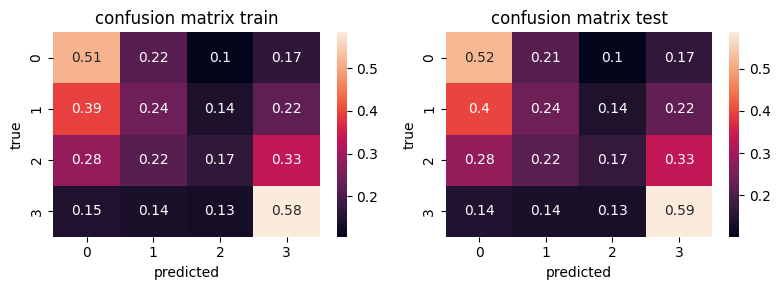

In [ ]:
import seaborn as sns
for ax,i in subplots(2, usizex=4): # Crear subplots
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

## Aplicar modelo al test.csv

In [ ]:
w = pd.read_csv("test.csv")
w

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta,0.168,0.410,0.235,0.300
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.471,0.184,0.264,0.193
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa,0.292,0.249,0.276,0.256
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.305,0.219,0.310,0.260


Limpieza de los datos nulos

In [ ]:
sum(w.ESTU_PRGM_DEPARTAMENTO.isna()), sum(w.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(w.FAMI_ESTRATOVIVIENDA.isna()) # Contar cuántos valores nulos hay en las columnas clave antes de reemplazar

(0, 2723, 13795)

In [ ]:
w.ESTU_PRGM_DEPARTAMENTO.values[w.ESTU_PRGM_DEPARTAMENTO.isna()] = 'no info' # Aqui se remplazan nulos en ESTU_PRGM_DEPARTAMENTO con 'no info'
w.ESTU_VALORMATRICULAUNIVERSIDAD.values[w.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info' #  nulos en ESTU_VALORMATRICULAUINIVERSIDAD con 'no info'
w.FAMI_ESTRATOVIVIENDA.values[w.FAMI_ESTRATOVIVIENDA.isna()] = 'no info' # nulos en FAMI_ESTRATOVIVIENDA con 'no info'
sum(w.ESTU_PRGM_DEPARTAMENTO.isna()), sum(w.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(w.FAMI_ESTRATOVIVIENDA.isna()) # Se verifica que ya no haya nulos en esas columnas

(0, 0, 0)

Limpieza de ESTU_PRGM_DEPARTAMENTO

In [ ]:
# Diccionario que asocia cada departamento con su región correspondiente
region_map = {
    'AMAZONAS': 'Amazonía',
    'ANTIOQUIA': 'Región Andina',
    'ARAUCA': 'Región Orinoquía',
    'ATLANTICO': 'Región Caribe',
    'BOGOTÁ': 'Centro',
    'BOLIVAR': 'Región Caribe',
    'BOYACA': 'Región Andina',
    'CALDAS': 'Región Andina',
    'CAQUETA': 'Amazonía',
    'CASANARE': 'Región Orinoquía',
    'CAUCA': 'Región Andina',
    'CESAR': 'Región Caribe',
    'CHOCO': 'Pacífico',
    'CORDOBA': 'Región Caribe',
    'CUNDINAMARCA': 'Centro',
    'GUAVIARE': 'Amazonía',
    'HUILA': 'Región Andina',
    'LA GUAJIRA': 'Región Caribe',
    'MAGDALENA': 'Región Caribe',
    'META': 'Región Orinoquía',
    'NARIÑO': 'Región Andina',
    'NORTE SANTANDER': 'Región Andina',
    'PUTUMAYO': 'Amazonía',
    'QUINDIO': 'Región Andina',
    'RISARALDA': 'Región Andina',
    'SAN ANDRES': 'Insular',
    'SANTANDER': 'Región Andina',
    'SUCRE': 'Región Caribe',
    'TOLIMA': 'Región Andina',
    'VALLE': 'Región Andina',
    'VAUPES': 'Amazonía',
}

In [ ]:
w['ESTU_REGIONES'] = w['ESTU_PRGM_DEPARTAMENTO'].map(region_map) # Se crea una nueva columna 'ESTU_REGIONES' mapeando desde los departamentos

Limpieza de ESTU_VALORMATRICULAUNIVERSIDAD

In [ ]:
estudiantes_program = w.groupby('ESTU_VALORMATRICULAUNIVERSIDAD').size() # Agrupar los datos por cada categoría del valor de matrícula y contar cuántos estudiantes hay en cada una
estudiantes_program # Mostrar el resultado para analizar la distribución de valores

,0
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,86923
Entre 2.5 millones y menos de 4 millones,55193
Entre 4 millones y menos de 5.5 millones,29855
Entre 5.5 millones y menos de 7 millones,16558
Entre 500 mil y menos de 1 millón,33564
Menos de 500 mil,34589
Más de 7 millones,29061
No pagó matrícula,8320
no info,2723


In [ ]:
import re
import pandas as pd
import numpy as np


def extraer_valores_matricula(rango):
    if isinstance(rango, str):
        rango = rango.lower()
          # Eliminar palabras no numéricas para facilitar extracción
        rango = rango.replace("millones", "").replace("entre", "").replace("menos de", "").replace("más de", "")

        if "no info" in rango:
            return -1
        numeros = re.findall(r'\d+\.?\d*', rango) # Extraer todos los números (enteros o decimales) presentesv

        if len(numeros) == 2:

            valor_min = float(numeros[0])
            valor_max = float(numeros[1])
            valor_promedio = (valor_min + valor_max) / 2
            return valor_promedio
        elif len(numeros) == 1: # Si solo hay un número

            return float(numeros[0])
        elif "no pagó matrícula" in rango:
                # Si no se cumple ningún caso, devolver NaN
            return 0
    return np.nan


w['ESTU_VALORMATRICULAUNIVERSIDAD'] = w['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna('').astype(str) # Asegurar que los datos estén como texto


w['VALOR_MATRICULA'] = w['ESTU_VALORMATRICULAUNIVERSIDAD'].apply(extraer_valores_matricula) # Aplicar la transformación a la columna de texto y crear una nueva columna numérica


print(w[['ESTU_VALORMATRICULAUNIVERSIDAD', 'VALOR_MATRICULA']].head()) # Verificar los primeros resultados para confirmar el procesamiento

             ESTU_VALORMATRICULAUNIVERSIDAD  VALOR_MATRICULA
0                          Menos de 500 mil           500.00
1  Entre 2.5 millones y menos de 4 millones             3.25
2    Entre 1 millón y menos de 2.5 millones             1.75
3    Entre 1 millón y menos de 2.5 millones             1.75
4  Entre 2.5 millones y menos de 4 millones             3.25


In [ ]:
estudiantes_program = w.groupby('VALOR_MATRICULA').size()
estudiantes_program #Visualizar

,0
VALOR_MATRICULA,
-1.00,2723
0.00,8320
1.75,86923
3.25,55193
4.75,29855
6.25,16558
7.00,29061
250.50,33564
500.00,34589


Limpieza de ESTRATOVIVIENDA

In [ ]:
w.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in w.FAMI_ESTRATOVIVIENDA.values]

In [ ]:
import pandas as pd
import numpy as np

# Diccionario para convertir los estratos en números
estrato_dict = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'no info': -1
}

# Aplicar la conversión en la columna 'FAMI_ESTRATOVIVIENDA'
w['ESTRATO_NUMERO'] = w['FAMI_ESTRATOVIVIENDA'].map(estrato_dict)

# Verifica el resultado
print(w[['FAMI_ESTRATOVIVIENDA', 'ESTRATO_NUMERO']].head())

  FAMI_ESTRATOVIVIENDA  ESTRATO_NUMERO
0            Estrato 3               3
1            Estrato 2               2
2            Estrato 3               3
3            Estrato 1               1
4            Estrato 2               2


In [ ]:
estudiantes_program = w.groupby('ESTRATO_NUMERO').size() # Contar cuántos estudiantes hay en cada estrato numérico
estudiantes_program

,0
ESTRATO_NUMERO,
-1,15219
1,48092
2,99288
3,90719
4,27823
5,10194
6,5451


Datos

In [ ]:
datost_ids = w['ID'].values
datost = w[['ESTU_REGIONES', 'VALOR_MATRICULA', 'ESTRATO_NUMERO']]
print ("shape of loaded dataframe", datost.shape)
datost.head()

shape of loaded dataframe (296786, 3)


,ESTU_REGIONES,VALOR_MATRICULA,ESTRATO_NUMERO
0,Región Caribe,500.00,3
1,Región Andina,3.25,2
2,Centro,1.75,3
3,Región Caribe,1.75,1
4,Región Caribe,3.25,2


convertir en onehot ESTU_REGIONES

In [ ]:
f = datost.ESTU_REGIONES.values
ESTU_REGIONES_vals = sorted(np.unique(f)) # Obtener los valores únicos ordenados
ESTU_REGIONES_onehot_vals = {val: np.eye(len(ESTU_REGIONES_vals))[i] for i,val in enumerate(ESTU_REGIONES_vals)}
ESTU_REGIONES_onehot_vals  # visualización del mapeo para verificación

{'Amazonía': array([1., 0., 0., 0., 0., 0., 0.]),
 'Centro': array([0., 1., 0., 0., 0., 0., 0.]),
 'Insular': array([0., 0., 1., 0., 0., 0., 0.]),
 'Pacífico': array([0., 0., 0., 1., 0., 0., 0.]),
 'Región Andina': array([0., 0., 0., 0., 1., 0., 0.]),
 'Región Caribe': array([0., 0., 0., 0., 0., 1., 0.]),
 'Región Orinoquía': array([0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
ESTU_REGIONES_onehot_enc = np.r_[[ESTU_REGIONES_onehot_vals[i] for i in datost.ESTU_REGIONES]] # Aplicar la codificación one-hot a cada valor en la columna ESTU_REGIONES
ESTU_REGIONES_onehot_enc # matriz resultante con codificación one-hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
ESTU_REGIONES_df = pd.DataFrame(ESTU_REGIONES_onehot_enc, columns=[f"REGION__{v}" for v in ESTU_REGIONES_onehot_vals]) # Cada columna representa una región, y los valores indican si el estudiante pertenece a esa región (1) o no (0)
ESTU_REGIONES_df # Visualizar el nuevo DataFrame codificado

,REGION__Amazonía,REGION__Centro,REGION__Insular,REGION__Pacífico,REGION__Región Andina,REGION__Región Caribe,REGION__Región Orinoquía
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
296781,0.0,1.0,0.0,0.0,0.0,0.0,0.0
296782,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296783,0.0,1.0,0.0,0.0,0.0,0.0,0.0
296784,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Concatenar el nuevo DataFrame codificado con el DataFrame original
# Luego se elimina la columna original 'ESTU_REGIONES', ya que ahora está representada en formato one-hot
datost = pd.concat([ESTU_REGIONES_df, datost], axis=1).drop('ESTU_REGIONES', axis=1)
datost.shape # Se verifica la nueva dimensión del DataFrame final

(296786, 9)

In [ ]:
datost.head()

,REGION__Amazonía,REGION__Centro,REGION__Insular,REGION__Pacífico,REGION__Región Andina,REGION__Región Caribe,REGION__Región Orinoquía,VALOR_MATRICULA,ESTRATO_NUMERO
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,500.00,3
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.25,2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.75,3
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.75,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.25,2


Construccion del modelo

In [ ]:
# Aqui se extrajo la matriz de características X a partir del DataFrame de test ordenando las columnas alfabéticamente
# Esto para asegurar que las columnas coincidan en orden con las del entrenamiento

X_test_data = datost[sorted(datost.columns)].values
X_test_data.shape # Verificamos la forma de los datos de prueba

(296786, 9)

In [ ]:
preds_test_data = model.predict(X_test_data) # Generamos las predicciones usando el modelo entrenado (GradientBoostingClassifier)

Cargar submission

In [ ]:
rmapi = {v:k for k,v in rg.items()} # Invertimos el diccionario de codificación de clases 'rg' para convertir las predicciones numéricas de vuelta a texto
text_preds_test_data = [rmapi[i] for i in preds_test_data] # Aplicamos el diccionario invertido a las predicciones para obtener etiquetas textuales

In [ ]:
submission = pd.DataFrame([datost_ids, text_preds_test_data], index = ['ID', 'RENDIMIENTO_GLOBAL']).T # Contiene las columnas 'ID' y 'RENDIMIENTO_GLOBAL' en el orden adecuado
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-bajo
2,499179,medio-bajo
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,bajo
296782,209415,bajo
296783,239074,medio-alto
296784,963852,alto


In [ ]:
submission.to_csv("submission.csv", index=False) # Se exporta el archivo en formato csv

In [ ]:
!head submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-bajo
499179,medio-bajo
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


In [ ]:
submission.shape

(296786, 2)

Enviar a kaggle

In [ ]:
#Se carga la solucion a kaggle
!kaggle competitions submit -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -f submission.csv -m "Santiago Alvarez Arrieta submission with linear model"

100% 3.94M/3.94M [00:00<00:00, 8.05MB/s]
Successfully submitted to UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia